In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

In [232]:
census = pd.read_csv('datasets/census_income.csv')
census.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# 1. Pre-processing

In [233]:
census.shape

(32561, 15)

In [234]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  Y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [235]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
Y                 0
dtype: int64

## 1.1 Analyzing the categorical columns

In [236]:
census['Y'].value_counts()

 <=50K    24720
 >50K      7841
Name: Y, dtype: int64

In [237]:
# There are no missing values as such.
# It is a classification problem and the dataset is imbalanced.
# Thorough analysis and cleaning is required.

In [238]:
#Perform label encoder on target variable

enc = LabelEncoder()
y = enc.fit_transform(census['Y'])

data = census.drop('Y', axis=1)
data['y'] = y
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [239]:
#There is a value of '?' in workplace column.
#All the values has leading whitespace. 

data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [240]:
#Lets remove unwanted whitespaces from all the categorical columns
#Need to check if '?' contains in other categorical columns

cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country']

filter_data = data.copy()
for col in cat_cols:
    filter_data[col] = data[col].str.strip()


filter_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [241]:
filter_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [242]:
#Workclass, occupation and native.country contains '?'

filter_data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
y                    0
dtype: int64

In [243]:
#Lets replace ? with Unknown

new_data = filter_data.replace('?', 'unknown')

new_data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
y                 0
dtype: int64

In [244]:
#Analyzing workclass

new_data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [245]:
workclass_mapping = {'State-gov': 'StateGovOfficial', 'Self-emp-not-inc' : 'NoFormalIncome',
                    'Federal-gov': 'CentralGovOfficial', 'Local-gov': 'StateGovOfficial', 'unknown': 'NoFormalIncome',
                    'Without-pay': 'NoFormalIncome', 'Never-worked': 'NoFormalIncome', 'Self-emp-inc': 'SelfEmployed'}

for val in workclass_mapping.keys():
    new_data.loc[new_data['workclass'] == val, 'workclass'] = workclass_mapping.get(val)
    
new_data['workclass'].value_counts()

Private               22696
NoFormalIncome         4398
StateGovOfficial       3391
SelfEmployed           1116
CentralGovOfficial      960
Name: workclass, dtype: int64

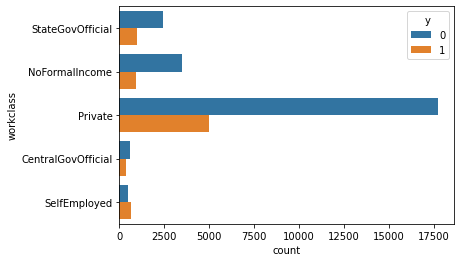

In [246]:
sns.countplot(y='workclass', data=new_data, hue='y');

In [247]:
#lets create dummies for workclass

workclass_dum = pd.get_dummies(prefix='workclass', columns=['workclass'], data=new_data, drop_first=True)
workclass_dum.head(5)

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,y,workclass_NoFormalIncome,workclass_Private,workclass_SelfEmployed,workclass_StateGovOfficial
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0,0,1
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,0,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,1,0,0


In [248]:
#Analyzing marital.status

workclass_dum['marital.status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [249]:
workclass_dum['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [250]:
mar_status_map = {'Never-married': 'NotMarried', 'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married',
                 'Married-spouse-absent': 'NotMarried', 'Married-AF-spouse': 'Married', 'Seperated': 'Seperated',
                 'Divorced': 'Divorced', 'Widowed': 'Widowed'}

for val in mar_status_map.keys():
    workclass_dum.loc[workclass_dum['marital.status'] == val, 'marital.status'] = mar_status_map.get(val)

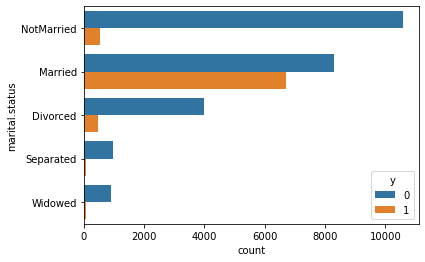

In [251]:
sns.countplot(y='marital.status', data=workclass_dum, hue='y');

In [252]:
#Married couple are geting more income
#Lets create dummies for these categories

marstatus_dum = pd.get_dummies(prefix='status', columns=['marital.status'], data=workclass_dum, drop_first=True)

marstatus_dum.head(10)

,age,fnlwgt,education,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,...,native.country,y,workclass_NoFormalIncome,workclass_Private,workclass_SelfEmployed,workclass_StateGovOfficial,status_Married,status_NotMarried,status_Separated,status_Widowed
0,39,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,...,United-States,0,0,0,0,1,0,1,0,0
1,50,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,...,United-States,0,1,0,0,0,1,0,0,0
2,38,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,...,United-States,0,0,1,0,0,0,0,0,0
3,53,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,...,United-States,0,0,1,0,0,1,0,0,0
4,28,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,...,Cuba,0,0,1,0,0,1,0,0,0
5,37,284582,Masters,14,Exec-managerial,Wife,White,Female,0,0,...,United-States,0,0,1,0,0,1,0,0,0
6,49,160187,9th,5,Other-service,Not-in-family,Black,Female,0,0,...,Jamaica,0,0,1,0,0,0,1,0,0
7,52,209642,HS-grad,9,Exec-managerial,Husband,White,Male,0,0,...,United-States,1,1,0,0,0,1,0,0,0
8,31,45781,Masters,14,Prof-specialty,Not-in-family,White,Female,14084,0,...,United-States,1,0,1,0,0,0,1,0,0
9,42,159449,Bachelors,13,Exec-managerial,Husband,White,Male,5178,0,...,United-States,1,0,1,0,0,1,0,0,0


In [253]:
#Lets create dummies one by one first sex then for race

marstatus_dum['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [254]:
marstatus_dum['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [255]:
sex_dum = pd.get_dummies(prefix='sex', columns=['sex'], data=marstatus_dum, drop_first=True)
sex_dum.head(5)

,age,fnlwgt,education,education.num,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,...,y,workclass_NoFormalIncome,workclass_Private,workclass_SelfEmployed,workclass_StateGovOfficial,status_Married,status_NotMarried,status_Separated,status_Widowed,sex_Male
0,39,77516,Bachelors,13,Adm-clerical,Not-in-family,White,2174,0,40,...,0,0,0,0,1,0,1,0,0,1
1,50,83311,Bachelors,13,Exec-managerial,Husband,White,0,0,13,...,0,1,0,0,0,1,0,0,0,1
2,38,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,0,0,40,...,0,0,1,0,0,0,0,0,0,1
3,53,234721,11th,7,Handlers-cleaners,Husband,Black,0,0,40,...,0,0,1,0,0,1,0,0,0,1
4,28,338409,Bachelors,13,Prof-specialty,Wife,Black,0,0,40,...,0,0,1,0,0,1,0,0,0,0


In [256]:
#Checking race column

sex_dum['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

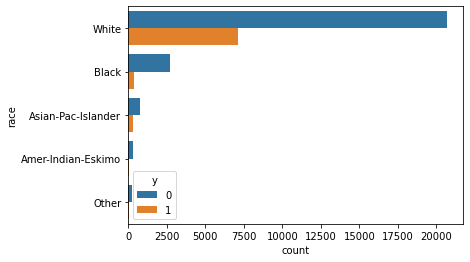

In [257]:
sns.countplot(y='race', data=sex_dum, hue='y');

In [258]:
race_dum = pd.get_dummies(prefix='race', columns=['race'], data=sex_dum, drop_first=True)
race_dum.head()

,age,fnlwgt,education,education.num,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,...,workclass_StateGovOfficial,status_Married,status_NotMarried,status_Separated,status_Widowed,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,Bachelors,13,Adm-clerical,Not-in-family,2174,0,40,United-States,...,1,0,1,0,0,1,0,0,0,1
1,50,83311,Bachelors,13,Exec-managerial,Husband,0,0,13,United-States,...,0,1,0,0,0,1,0,0,0,1
2,38,215646,HS-grad,9,Handlers-cleaners,Not-in-family,0,0,40,United-States,...,0,0,0,0,0,1,0,0,0,1
3,53,234721,11th,7,Handlers-cleaners,Husband,0,0,40,United-States,...,0,1,0,0,0,1,0,1,0,0
4,28,338409,Bachelors,13,Prof-specialty,Wife,0,0,40,Cuba,...,0,1,0,0,0,0,0,1,0,0


In [259]:
#Checking ocupation

race_dum['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

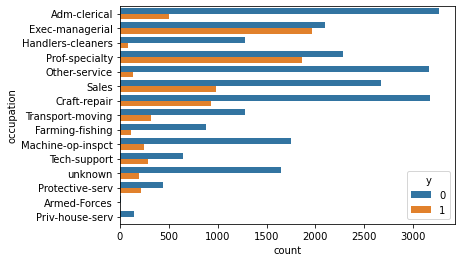

In [260]:
sns.countplot(y='occupation', data=sex_dum, hue='y');

In [261]:
occ_dum = pd.get_dummies(prefix='occupation', columns=['occupation'], data=race_dum, drop_first=True)
occ_dum.head(5)

,age,fnlwgt,education,education.num,relationship,capital.gain,capital.loss,hours.per.week,native.country,y,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown
0,39,77516,Bachelors,13,Not-in-family,2174,0,40,United-States,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,Bachelors,13,Husband,0,0,13,United-States,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,HS-grad,9,Not-in-family,0,0,40,United-States,0,...,1,0,0,0,0,0,0,0,0,0
3,53,234721,11th,7,Husband,0,0,40,United-States,0,...,1,0,0,0,0,0,0,0,0,0
4,28,338409,Bachelors,13,Wife,0,0,40,Cuba,0,...,0,0,0,0,1,0,0,0,0,0


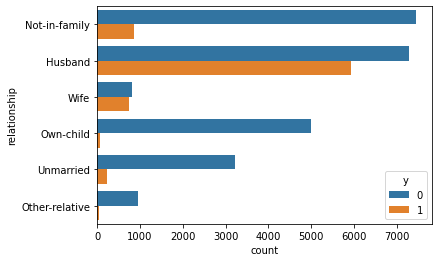

In [262]:
#Relationship

sns.countplot(y='relationship', data=occ_dum, hue='y');

In [263]:
rel_dum = pd.get_dummies(prefix='relationship', columns=['relationship'], data=occ_dum, drop_first=True)
rel_dum.head(5)

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,native.country,y,workclass_NoFormalIncome,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,77516,Bachelors,13,2174,0,40,United-States,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,Bachelors,13,0,0,13,United-States,0,1,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,HS-grad,9,0,0,40,United-States,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,Bachelors,13,0,0,40,Cuba,0,0,...,0,0,0,0,0,0,0,0,0,1


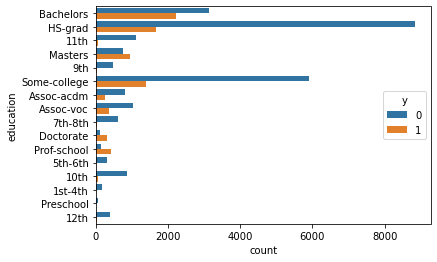

In [264]:
#Education

sns.countplot(y='education', data=rel_dum, hue='y');

In [265]:
edu_map = {'Preschool': 'Dropout', '1st-4th': 'Dropout', '5th-6th': 'Dropout', '7th-8th': 'Dropout', '9th': 'Dropout',
          '10th': 'Dropout', '11th': 'Dropout', '12th': 'Dropout', 'HS-grad': 'HighGrad', 'Some-college': 'College', 'Assoc-acdm': 'College',
          'Assoc-voc': 'College', 'Prof-school': 'Masters'}

for edu in edu_map.keys():
    rel_dum.loc[rel_dum['education'] == edu, 'education'] = edu_map.get(edu)

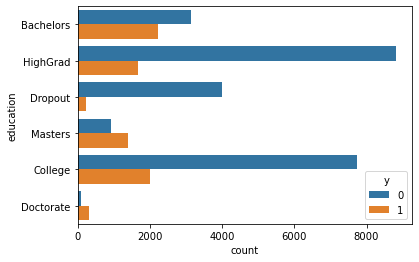

In [266]:
sns.countplot(y='education', data=rel_dum, hue='y');

In [268]:
enc = LabelEncoder()
edu = enc.fit_transform(rel_dum['education'])

edu_data = rel_dum.drop('education', axis=1)
edu_data['education'] = edu

edu_data.head(5)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,native.country,y,workclass_NoFormalIncome,workclass_Private,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,education
0,39,77516,13,2174,0,40,United-States,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,83311,13,0,0,13,United-States,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0,0,40,United-States,0,0,1,...,0,0,0,0,1,0,0,0,0,4
3,53,234721,7,0,0,40,United-States,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,28,338409,13,0,0,40,Cuba,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [271]:
#Lets drop the country column now

census_cat = edu_data.drop('native.country', axis=1)
census_cat.head(5)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,y,workclass_NoFormalIncome,workclass_Private,workclass_SelfEmployed,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,education
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 1.2 Analyzing the numerical columns

In [277]:
#Straightaway can drop education.num as education column is already being taken care of.
#Then we should try to treat the outliers.

In [278]:
census_all = census_cat.drop('education.num', axis=1)
census_all.head(5)

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,y,workclass_NoFormalIncome,workclass_Private,workclass_SelfEmployed,workclass_StateGovOfficial,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,education
0,39,77516,2174,0,40,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,50,83311,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [280]:
num_cols = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

census_num = census_all[num_cols]

census_num.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


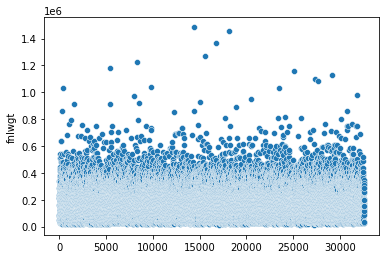

In [281]:
#fnlwgt

sns.scatterplot(y=census_all['fnlwgt'], x = census_all.index, data=census_all);

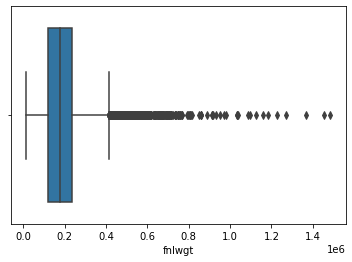

In [282]:
sns.boxplot(x=census_all['fnlwgt'], data=census_all);